# Ant Colony Optimization Algorithm

<p style='text-align: justify;'> 
In this section, we will study the concepts inspired by the behavior of ants searching for shorter paths to a food source, leaving pheromone trails to communicate with other ants.
</p>

## Objectives

* **Understand** how ant colony optimization works,
* **Learn** how to implement an ant colony optimization, 
* **Explore** the different ways to resolve the traveling salesman problem.

## The problem: Find the best route between cities effectively

Finding the best route maybe a huge problem if the number of cities is large. This problem has a factorial complexity, $O(n!)$, where $n$ is the number of cities.

## The solution: Ant colony optimization (ACO)

In nature, ants have their own way to find the best path to find food. Their natural behavior stands on the use of their own pheromone to keep the track of the best route.

## What is ACO?

ACO, acronym of ant colony optimization, is a metaheuristic optimization algorithm inspired by the foraging behavior of ants. Marco Dorigo originally proposed it in the early $1990$s. The algorithm is used to solve combinatorial optimization problems, which involve finding the best solution from a finite set of possible solutions.

## How do ants do it?
    
In nature, ants can find the shortest path between their nest and a food source by laying down pheromone trails. The more ants use a particular path, the stronger the pheromone trail. Ants are more likely to follow paths with more robust pheromone trails, leading to a self-reinforcing effect where shorter routes get reinforced and more extended ways fade away.


## Travelling salesman problem (TSP)

### What is it?

The Traveling Salesman Problem (TSP) is a classic and well-known optimization problem in computer science, mathematics, and operations research. The problem can be described as follows:

- Given a list of cities and the distances between each pair of cities, the task is to find the shortest possible route that visits each city exactly once and returns to the starting city. The objective is to minimize the total distance traveled by the salesman during the entire journey.

### Where is used?

- **Vehicle Routing and Delivery Services**: In logistics and transportation, companies often face the challenge of efficiently routing their vehicles to deliver goods to multiple destinations. The TSP can be applied to find the shortest and most optimal routes for delivery trucks, saving time, fuel, and overall operational costs. By solving the TSP, delivery service providers can optimize their routes, ensuring that each customer is served while minimizing the distance traveled.

- **Printed Circuit Board Manufacturing**: When designing printed circuit boards (PCBs) for electronic devices, engineers must determine the most efficient path for automated drilling machines to connect components. The TSP can be used to find the shortest way to drill all the necessary holes, thus reducing manufacturing time and improving the overall quality of the PCB.

- **DNA Sequencing and Genome Assembly**: In bioinformatics, DNA sequencing involves determining the order of nucleotides in a DNA molecule. When dealing with large-scale genome sequencing projects, scientists encounter the problem of assembling fragments of DNA into the original genome. The TSP can be used to order these fragments and find the most likely arrangement, helping researchers piece together the complete genetic sequence more accurately and efficiently.


### What are the limitations of the method?

The TSP is an NP-hard problem, making it increasingly difficult to find optimal solutions as the number of cities increases. As the TSP grows, the number of possible permutations of cities grows exponentially, making it computationally infeasible to explore all possible solutions in a reasonable amount of time.

The limitations of traditional exact algorithms for solving the TSP, such as brute-force or dynamic programming, include:

- **High computational complexity**: As the number of cities increases, the time required to find the optimal solution grows exponentially. For large instances of the TSP, finding the best solution becomes practically impossible.

- **Infeasible for large instances**: Exact algorithms may work well for small TSP instances with a handful of cities, but they quickly become unmanageable when the number of towns exceeds a certain threshold.

- **No guarantee of finding the global optimum**: Heuristic algorithms, like the nearest neighbor or genetic algorithms, can provide reasonable approximate solutions for large TSP instances, but they do not guarantee to find the globally optimal solution.

### ACO comes into play

ACO leverages this natural process to find near-optimal solutions for complex optimization problems, including the TSP. How ACO helps overcome the limitations of traditional algorithms:

- **Exploitation and exploration**: ACO combines exploitation (reinforcement of strong paths) and exploration (discovery of new paths) during the solution construction. This allows the algorithm to focus on promising areas of the solution while still exploring other possibilities, increasing the chances of finding reasonable solutions.

- **Scalability**: ACO performs well even for large TSP instances due to its probabilistic nature and parallelism. The algorithm searches for solutions through multiple artificial ants, and as the iterations progress, the pheromone trails guide the ants toward better paths, leading to convergence.

- **Ability to escape local optima**: ACO's probabilistic nature allows it to escape local optima and explore different parts of the solution space. This stochastic behavior helps prevent premature convergence to suboptimal solutions, making ACO more robust in finding high-quality solutions for the TSP.

- **Adaptability and self-organization**: The pheromone trails are dynamically updated as the ants construct solutions. This adaptability helps the algorithm respond to changes in the problem space and converge towards better solutions over time.

## Some concepts of ACO

- **Graph Representation**: In ACO, the problem is represented as a graph where nodes represent cities or components of the problem, and edges represent the connections between these cities or parts. The weight of each edge represents a measure of desirability or cost (e.g., distance, time, or any other metric).

- **Pheromone Trails**: ACO uses pheromone trails to model the communication among ants. The pheromone level on each edge represents the probability of an ant choosing that edge during its solution construction. Higher pheromone levels indicate a more desirable path.

- **Convergence Criteria**: ACO terminates when a predefined stopping condition is met, such as reaching a maximum number of iterations or finding a satisfactory solution.

There are several other concepts about ACO, but we will stick with only these three.

## Mathematics behind ACO

### Edge selection

Each movement of the ant is done by a probability calculation using some parameters. Here we will not discuss those parameters, but if you want to learn more, [click here](https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms). Imagine we have five cities to travel. The first formula represents the probability an ant will chose to travel to an specific city instead of others:

$$ p^k_{xy} = \frac{(\tau^\alpha_{xy})(\eta^\beta_{xz})}{\sum_{z\in allowed_y}(\tau^\alpha_{xy})(\eta^\beta_{xz})}$$

### Pheromone update
Trails are usually updated when all ants have completed their solution, increasing or decreasing the level of trails corresponding to moves that were part of "good" or "bad" solutions, respectively. An example of a global pheromone updating rule is

$$  \tau_{xy} \leftarrow (1 - \rho)\tau_{xy} + \sum \limits _{k} ^{m} \Delta\tau^k_{xy}$$

where $\tau_{xy}$ is the amount of pheromone deposited for a state transition $xy$, $\rho$ is the pheromone evaporation coefficient, $m$ is the number of ants and 
$\Delta\tau^k_{xy}$ is the amount of pheromone deposited by the $k_{th}$ ant, typically given for a TSP problem (with moves corresponding to arcs of the graph) by

$$  \Delta\tau^k_{xy} = \begin{cases} Q/L_k & \text{if ant k uses curve xy in its tour } \\ 0 & \text{otherwise }  \end{cases}$$

where $L_k$ is the cost of the tour of the $k_{th}$ ant (typically length) and $Q$ is a constant.

## ACO brief simulation

<p style='text-align: justify;'>
Below, we have an animation of the simulation of the ACO algorithm to find the best route between two points. Notice that initially, all paths are considered potential routes. However, after a few iterations, the best way stands out among the others and is used by almost all ants, eventually becoming the <i>only</i> possible route.
</p>

<div style="display: flex; justify-content: center;">
    <img src="./images/ACO_GIF.gif" alt="segment" />
</div>

## ☆ Challenge: Traveling through Spain ☆

Consider the following problem:
<p style="text-align: justify;">
After years dedicated to tending and protecting his precious plantations on the farm, a farmer finally decided to treat himself to well-deserved vacations and set off on a journey through the beautiful landscapes of Spain. He then decided to visit eight renowned cities during this unique adventure.
</p>

<p style="text-align: justify;">
Recognizing the value of time, the farmer understands the importance of finding the most efficient route to travel through all the cities, ensuring a seamless journey with the shortest travel time between each destination.
</p>
    
<p style="text-align: justify;">
The map of Spain takes the form of a graph, where cities are represented as nodes and the roads connecting them as edges. Each edge is associated with a distance in miles between each pair of cities. Although the farmer is free to choose a starting city, he must visit exactly eight distinct cities, avoiding revisits during his expedition.
</p>

<p style="text-align: center;">
 <img src="./images/figure08_cities.png"  width="500" height="500">
</p>

<p style="text-align: justify;">
Your mission is to assist the farmer in creating the optimal order to visit all the cities, allowing him to explore their wonders while spending the least amount of time on the road. To do that, answer the following items:
</p>

a) Implement a bio-inspired algorithm using **ACO**,

b) Find the best route between the cities using **ACO**.

`As support you will have at your disposal an adjacency matrix, where you will have access to all possible distances between each of the cities`. This table will help you in solving the proposed problem.
</p>

<p style="text-align: center;">
 <img src="./images/figure09_cities_distances_table.png"  width="500" height="500">
</p>

### ☆ Solution ☆ 

First we need to import the packages.

In [1]:
import itertools
import time
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

Let's insert all cities connections and their distances.

In [2]:
cities = {
    ("Murcia", "Jaén"): 368,
    ("Murcia", "Valencia"): 241,
    ("Murcia", "Madrid"): 401,
    ("Jaén", "Madrid"): 335,
    ("Madrid", "Valladolid"): 193,
    ("Madrid", "Bilbao"): 395,
    ("Madrid", "Zaragoza"): 325,
    ("Valladolid", "Bilbao"): 280,
    ("Bilbao", "Zaragoza"): 324,
    ("Zaragoza", "Barcelona"): 296,
    ("Valencia", "Murcia"): 241,
    ("Valencia", "Barcelona"): 349
}

# Convert the city names to a set of unique city names
unique_cities = set(sum(cities, ()))

Simple function to return the distance between two cities and calculate the total path distance:

In [3]:
def distance(city1, city2):
    if (city1, city2) in cities:
        return cities[(city1, city2)]
    elif (city2, city1) in cities:
        return cities[(city2, city1)]
    elif city1 == city2:
        return 0
    else:
        return float('inf')  # Return a large value for non-connected cities
    
def total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance(route[i], route[i + 1])
    return total_distance

We also need an algorithm to plot the cities at their positions. Since our problem has real cities names, we can use the `GeoFunctions` from python. This algorithm uses the name of the city to find its location and relationship to every other named city. At the end, the cities relative positions to each other is very similar to the problems image.    

In [4]:
def get_coordinates(city):
    geolocator = Nominatim(user_agent="city_locator")
    location = geolocator.geocode(city)
    return location.latitude, location.longitude

def plot_route(best_route):
    plt.figure(figsize=(10, 8))
    for i in range(len(best_route) - 1):
        city1, city2 = best_route[i], best_route[i + 1]
        distance_between_cities = distance(city1, city2)
        coords1 = get_coordinates(city1)
        coords2 = get_coordinates(city2)
        plt.plot([coords1[1], coords2[1]], [coords1[0], coords2[0]], 'b', linewidth=1)
        plt.scatter(coords1[1], coords1[0], color='blue', marker='o')
        plt.scatter(coords2[1], coords2[0], color='blue', marker='o')
        plt.text(coords1[1], coords1[0], city1, fontsize=12, ha='center', va='center', color='red')
        plt.text(coords2[1], coords2[0], city2, fontsize=12, ha='center', va='center', color='red')
        mid_latitude = (coords1[0] + coords2[0]) / 2
        mid_longitude = (coords1[1] + coords2[1]) / 2
        plt.text(mid_longitude, mid_latitude, f"{distance_between_cities} km", fontsize=10, ha='center', va='center', color='black')
    plt.title("Best Route")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()

Let's see the solution with the ACO implementation. The following code blocks are the ACO implementation. First, let's create a class to represent each ant of our algorithm:

In [5]:
class Ant:
    def __init__(self, cities, alpha, beta):
        """
        Initialize an Ant object.

        Parameters:
        - cities (set): A set of unique city names.
        - alpha (float): The importance of pheromone in the ant's decision-making process.
        - beta (float): The importance of distance in the ant's decision-making process.
        """
        self.cities = cities
        self.alpha = alpha
        self.beta = beta
        self.path = []  # Stores the path taken by the ant (list of cities)
        self.visited = set()  # Set to keep track of visited cities
        self.current_city = None  # The current city the ant is in
        self.unique_cities = unique_cities  # Set of unique city names

    def select_next_city(self, pheromone_matrix):
        """
        Select the next city for the ant to move to based on pheromone levels and distance.

        Parameters:
        - pheromone_matrix (dict): A dictionary representing pheromone levels between cities.

        This method uses a probabilistic approach to choose the next city, considering both
        pheromone levels and distance between cities. It updates the ant's path, visited cities,
        and the current city accordingly.
        """
        unvisited_cities = [city for city in self.unique_cities if city not in self.visited and city != self.current_city]

        probabilities = []
        total = 0

        for city in unvisited_cities:
            distance_to_city = distance(self.current_city, city)

            if(distance_to_city > 0):  # Two different cities
                pheromone = pheromone_matrix[self.current_city][city]
                probabilities.append((pheromone ** self.alpha) * (1.0 / distance_to_city) ** self.beta)
            else:
                probabilities.append(0)

            total += probabilities[-1]

        if(total > 0):
            probabilities = [p / total for p in probabilities]
        else:
            probabilities = [0 for p in probabilities]
        
        if(sum(probabilities) > 0.9):
            selected_city = np.random.choice(unvisited_cities, size=1, p=probabilities)[0]
            self.path.append(selected_city)
            
            self.visited.add(selected_city)
            self.current_city = selected_city


Below is an example code that uses ACO to solve the TSP:

In [6]:
def ant_colony_optimization(cities, num_ants, num_iterations, alpha=1.0, beta=5.0, evaporation=0.5):
    """
    Solve the Traveling Salesman Problem using Ant Colony Optimization (ACO) algorithm.

    Parameters:
    - cities (dict): A dictionary with city pairs as keys and distances as values.
    - num_ants (int): The number of ants (iterations) to run in each cycle.
    - num_iterations (int): The number of iterations (cycles) for the optimization process.
    - alpha (float, optional): The importance of pheromone in ant decision-making (default is 1.0).
    - beta (float, optional): The importance of distance in ant decision-making (default is 5.0).
    - evaporation (float, optional): Pheromone evaporation rate (default is 0.5).

    Returns:
    - best_route (list): A list representing the best route found by the algorithm.
    - best_distance (float): The total distance of the best route found.

    This function implements the Ant Colony Optimization algorithm to find the best route
    for the Traveling Salesman Problem (TSP). It repeatedly constructs routes for each ant,
    updates pheromone levels, and selects the best route with the smallest distance found
    during the specified number of iterations.
    """
    num_cities = len(unique_cities)
    pheromone_matrix = {city1: {city2: 1.0 for city2 in unique_cities if city1 != city2} for city1 in unique_cities}

    best_route = None
    best_distance = float('inf')  # Set an initial value for best_distance

    for _ in range(num_iterations):
        ants = [Ant(unique_cities, alpha, beta) for _ in range(num_ants)]

        starting_cities = list(unique_cities)
        np.random.shuffle(starting_cities)
        starting_cities = starting_cities * num_ants  # Repeat the starting cities to match the number of ants

        # Initialize each ant's current city randomly
        for i, ant in enumerate(ants):
            ant.current_city = starting_cities[i]
            ant.visited.add(ant.current_city[0])

        # Construct the complete tour for each ant
        for _ in range(num_cities):
            for ant in ants:
                ant.select_next_city(pheromone_matrix)

        # Calculate the total distance of each ant's tour
        for ant in ants:
            ant_total_distance = total_distance(ant.path)

            if ant_total_distance < best_distance:
                if(len(ant.path) == len(unique_cities)): # Checking if that path is a valid one
                    best_route = ant.path.copy()
                    best_distance = ant_total_distance

        # Update pheromone levels
        for city1 in unique_cities:
            for city2 in unique_cities:
                if city1 != city2:
                    pheromone_matrix[city1][city2] *= (1 - evaporation)

        for ant in ants:
            if len(ant.path) >= 2:
                if(best_distance > 0):
                    pheromone_delta = 1.0 / best_distance
                    for i in range(len(ant.path) - 1):
                        city1, city2 = ant.path[i], ant.path[i + 1]                                     
                        pheromone_matrix[city1][city2] += pheromone_delta

    return best_route, best_distance


Finally, the usage example with the ACO implementation. Notice that this solution might not provide the best possible route. Try increasing and decreasing the number of iterations and check the results.

Best Route: ['Valencia', 'Murcia', 'Jaén', 'Madrid', 'Valladolid', 'Bilbao', 'Zaragoza', 'Barcelona']
Best Distance: 2037


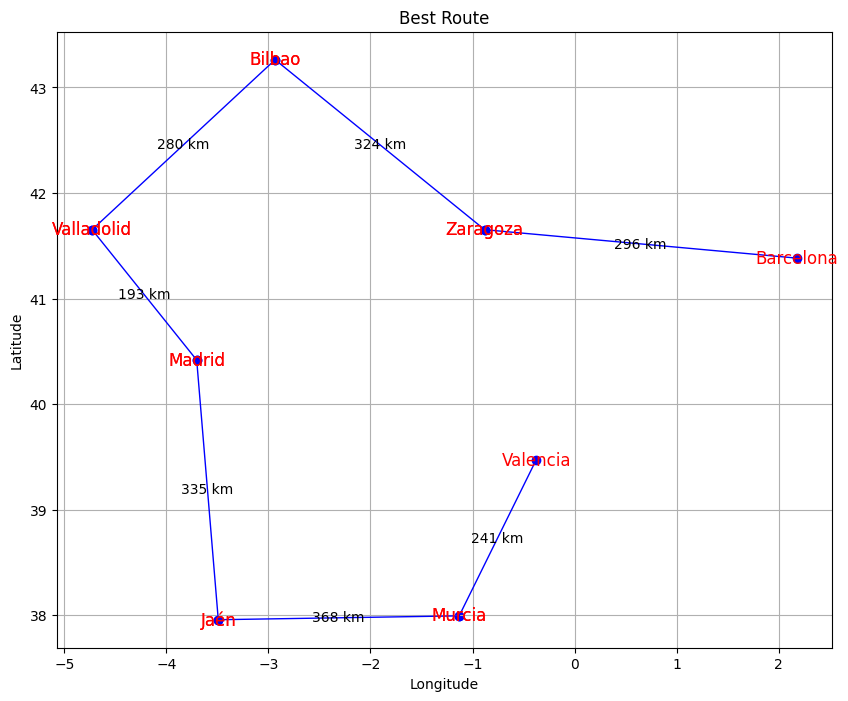

In [7]:
# Example usage:
num_ants = 1
num_iterations = 1

best_route, best_distance = ant_colony_optimization(cities, num_ants, num_iterations)

print("Best Route:", best_route)
print("Best Distance:", best_distance)

plot_route(best_route)

<p style='text-align: justify;'>
The main difference between the approach with and without ACO is that ACO is a biologically-inspired algorithm that simulates the behavior of ants when searching for shorter paths using pheromones. ACO tends to be more efficient in complex TSP problems with many cities because it leverages collective information about promising ways.
</p>

<p style='text-align: justify;'>
On the other hand, the approach without ACO is more straightforward. Still, as the number of cities increases, the number of permutations to be examined grows exponentially, making the problem computationally infeasible for many cities.
</p>

## Convergence in ACO

<p style='text-align: justify;'>
Convergence is a crucial aspect of the ACO algorithm. It refers to the process by which the algorithm approaches a solution considered satisfactory or close to the optimal solution. The ACO is designed to converge towards better solutions over time by collaborating with ants and modifying pheromone trails. The convergence process in ACO can be described as follows:

1. <strong>Exploration</strong>: In the early iterations, the ants explore the solution space by randomly choosing paths between cities. The exploration phase allows the ants to discover different routes and update the pheromone trails accordingly.

2. <strong>Exploitation</strong>: As the algorithm progresses, the ants exploit the information gathered from the pheromone trails. They are likelier to choose paths with higher pheromone intensity, reflecting paths frequently traveled by other ants. This exploitation mechanism allows the ants to focus on promising ways and reduces the search space.

3. <strong>Positive feedback</strong>: The exploitation of highly pheromone-intensive paths creates positive feedback. As more ants follow these paths, their pheromone intensity increases further, making those paths even more attractive to future ants. This positive feedback reinforces the convergence towards the best path.

4. <strong>Convergence to optimal solution</strong>: Over several iterations, the algorithm converges towards a solution representing a trade-off between exploration and exploitation. The convergence process helps the ants concentrate on the most promising paths, ultimately leading to identifying a relatively good solution to the optimization problem.

It is important to note that the convergence of ACO is only guaranteed to find the globally optimal solution for some problem instances. Depending on the problem complexity, parameter settings, and the initial pheromone distribution, ACO may converge to a local optimum, the best solution within a specific neighborhood, but not the globally optimal solution.

To enhance the convergence of ACO, researchers, and practitioners often experiment with various parameter configurations, pheromone update strategies, and problem-specific heuristics. Additionally, combining ACO with other metaheuristic algorithms or problem-specific optimization methods can improve the convergence and solution quality.
</p>    

## Summary

In this notebook we have shown: 

- Implement a bio-inspired algorithm using **ACO**,
- Find the best route between the cities using the **ACO**.

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [8]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

In this section, you learned how to apply the Ant Colony Optimization (ACO) algorithm using Python to optimize a route-finding problem. In the next section, you will learn about other bio-inspired algorithms such as the one based on a flock of bird using [_04-bio-inspired-particle-swarm-optimization.ipynb_](04-bio-inspired-particle-swarm-optimization.ipynb).